In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import caffe
import time
import glob

In [2]:
def top_k(result, top_num, label_arr):
    tmp = -(top_num+1)
    top_k = result.flatten().argsort()[-1:tmp:-1]
    top_num = 1
    for i in np.arange(top_k.size):
        print("Top %d:\tProb:%2.4f%%\t[%d]\t %s"%(top_num,result[top_k[i]]*100,top_k[i], labels[top_k[i]]))
        top_num = top_num + 1

In [3]:
def loss_rate(arr1, arr2):
#     print arr1, arr2
    return np.sum(np.absolute(np.subtract(arr1,arr2)))/len(arr1)


Input image dimension (32, 32, 3)


(-0.5, 31.5, 31.5, -0.5)

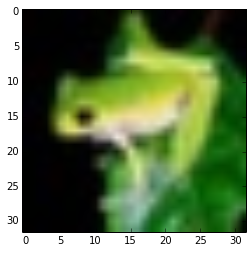

In [4]:
image_name = '104_frog'
image_path = '/home/caslab/workspace/NVDLA/sw_5_17/sw/prebuilt/linux/image/cifar10/train/'+ image_name +'.jpg'
im = caffe.io.load_image(image_path)
print "Input image dimension" , im.shape
plt.imshow(im)
plt.axis('on')

In [5]:
labels_filename = '/home/caslab/workspace/dataset/cifar/labels.txt'
labels = np.loadtxt(labels_filename, str, delimiter='\t')
print("Read label ... %s"%labels_filename)
print ("Number of class is %d"%len(labels))

Read label ... /home/caslab/workspace/dataset/cifar/labels.txt
Number of class is 10


In [6]:
print ("Open DIMG file ...")
dimg_path = '/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/no_mean/'
dimg_file_no_mean = dimg_path + 'output.dimg'
print dimg_file_no_mean
dimg_no_mean = np.genfromtxt(dimg_file_no_mean, float, delimiter=' ')

# dimg_file_mean_bgr =  dimg_path +  'alexnet_mean_BGR.dimg'
# dimg_mean_bgr = np.genfromtxt(dimg_file_mean_bgr, float, delimiter=' ')

# dimg_file_mean_rgb =  dimg_path +  'alexnet_mean_RGB.dimg'
# dimg_mean_rgb = np.genfromtxt(dimg_file_mean_rgb, float, delimiter=' ')

# print ("DImg size of %d"%len(dimg))
# (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(dimg_file)
# print("\nNVDLA last modified: %s" % time.ctime(mtime))

Open DIMG file ...
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/no_mean/output.dimg


In [7]:
print "Caffe model config ..."
pycaffe_dir = '/home/caslab/workspace/caffe/caffe/python/'
model_dir = '/home/caslab/workspace/NVDLA/sw_5_17/sw/prebuilt/linux/model/'
input_file = image_path
model_def = os.path.join(model_dir,"cifar10/cifar10_quick.prototxt")
pretrained_model = os.path.join(model_dir,"cifar10/cifar10_quick_iter_4000.caffemodel")
print (model_def,"\n",pretrained_model)
gpu = False
center_only = True
images_dim = '32,32'
mean_file = '/home/caslab/workspace/caffe/caffe/examples/cifar10/mean.npy'
# input_scale = 
raw_scale = 255.0
channel_swap = '2,1,0'
ext = 'jpg'


image_dims = [int(s) for s in images_dim.split(',')]
# print image_dims

mean, channel_swap_arr = None, None
if mean_file:
    mean = np.load(mean_file)
    # mean=mean.mean(1).mean(1) # add
if channel_swap:
    channel_swap_arr = [int(s) for s in channel_swap.split(',')]
#     print channel_swap_arr
if gpu:
    caffe.set_mode_gpu()
    print("GPU mode")
else:
    caffe.set_mode_cpu()
    print("\tCPU mode")

Caffe model config ...
('/home/caslab/workspace/NVDLA/sw_5_17/sw/prebuilt/linux/model/cifar10/cifar10_quick.prototxt', '\n', '/home/caslab/workspace/NVDLA/sw_5_17/sw/prebuilt/linux/model/cifar10/cifar10_quick_iter_4000.caffemodel')
	CPU mode


In [8]:
classifier = caffe.Classifier(model_def, pretrained_model,
        image_dims=image_dims, mean=None,
#         image_dims=image_dims, mean=mean,
        raw_scale=raw_scale,
        channel_swap=channel_swap_arr)

init_time: 0.00052285194397


In [9]:
load_img_time_start = time.time()
# Load image file.
print("Loading folder: %s" % input_file)
inputs =[caffe.io.load_image(input_file)]
load_img_time_end = time.time()

Loading folder: /home/caslab/workspace/NVDLA/sw_5_17/sw/prebuilt/linux/image/cifar10/train/104_frog.jpg


In [10]:
print("Classifying %d inputs." % len(inputs))

# Classify.
predictions = classifier.predict(inputs, not center_only)
end = time.time()
print ""
# print predictions
# top_k(result = predictions[0], top_num = 10, label_arr = labels)

Classifying 1 inputs.
Time:  0.000951051712036



Input image dimension (32, 32, 3)


(-0.5, 31.5, 31.5, -0.5)

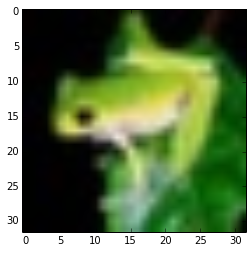

In [11]:
print "Input image dimension" , im.shape
plt.imshow(im)
plt.axis('on')

In [12]:
print("Predict obect .... [truck]\n")
print("Caffe Prediction Result")
top_k(result = predictions[0], top_num = 10, label_arr = labels)
print("\nNVDLA Prediction Result No Mean")
top_k(result = dimg_no_mean, top_num = 10, label_arr = labels)
# print("\nNVDLA Prediction Result Mean BGR")
# top_k(result = dimg_mean_bgr, top_num = 10, label_arr = labels)
# print("\nNVDLA Prediction Result Mean RGB")
# top_k(result = dimg_mean_rgb, top_num = 10, label_arr = labels)

Predict obect .... [truck]

Caffe Prediction Result
Top 1:	Prob:49.2352%	[5]	 dog
Top 2:	Prob:25.2585%	[3]	 cat
Top 3:	Prob:13.7763%	[2]	 bird
Top 4:	Prob:6.0141%	[0]	 airplane
Top 5:	Prob:2.2497%	[9]	 truck
Top 6:	Prob:1.5643%	[4]	 deer
Top 7:	Prob:0.8784%	[7]	 horse
Top 8:	Prob:0.6225%	[1]	 automobile
Top 9:	Prob:0.3743%	[6]	 frog
Top 10:	Prob:0.0266%	[8]	 ship

NVDLA Prediction Result No Mean
Top 1:	Prob:35.9863%	[5]	 dog
Top 2:	Prob:16.7847%	[2]	 bird
Top 3:	Prob:14.4165%	[3]	 cat
Top 4:	Prob:12.1643%	[9]	 truck
Top 5:	Prob:9.8816%	[0]	 airplane
Top 6:	Prob:4.7089%	[1]	 automobile
Top 7:	Prob:3.6835%	[7]	 horse
Top 8:	Prob:1.4725%	[4]	 deer
Top 9:	Prob:0.6638%	[6]	 frog
Top 10:	Prob:0.2245%	[8]	 ship


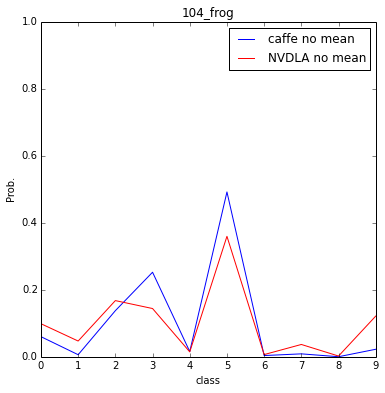

Loss rate with caffe and nvdla : 4.835199% 



In [17]:
pixel_width = 6
pixel_height = 6
plt.figure(figsize=(pixel_width, pixel_height))
aa = range(0,10)

l1, = plt.plot(aa,predictions[0], label = 'caffe no mean', color = 'blue')
l2, = plt.plot(aa,dimg_no_mean, label = 'NVDLA no mean', color = 'red')
# l3, = plt.plot(aa,dimg_mean_bgr, label = 'mean BGR', color = 'black')
# l4, = plt.plot(aa,dimg_mean_rgb, label = 'mean RGB', color = 'green')

plt.xlim((0, 9))
plt.ylim((0, 1))
plt.title(image_name)
plt.xlabel('class')
plt.ylabel('Prob.')

plt.legend() #, labels = ['caffe', 'no mean'], loc = 'best')

plt.show()
print("Loss rate with caffe and nvdla : %f%% \n"%(loss_rate(predictions[0], dimg_no_mean)*100))
# 
# # print aa
# plt.plot(aa,predictions[0],'y--',aa, dimg_no_mean , 'r--', aa, dimg_mean_bgr, 'b--', aa, dimg_mean_rgb, 'g--')
# plt.axis([0, 50, 0, 1])
# plt.show()

In [20]:
for root, directories, filenames in os.walk('/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/'):
    for filename in filenames:
        if 'dimg' in filename:
            print os.path.join(root,filename)

/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/103_frog.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/21_cat.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/85_horse.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/110_truck.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/87_horse.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/16_dog.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/10_airplane.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/11_horse.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/20_horse.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/63_bird.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/8_cat.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/115_airplane.dimg
/home/caslab/workspace/NVDLA/sw_6_1/prebuilt/linux/runtime/test/